## Pokemon Clustering 

In this project, we will work with the Pokemon dataset from Kaggle, https://www.kaggle.com/abcsds/pokemon. we are interested in seeing if there are any sub clusters of pokemon based on these infomation, and if so, find out the number of clusters there are, and plot the result.
>
>This dataset includes 721 Pokemon. The information in this dataset includes Pokemon name, type, health points, attack strength, defensive strength, speed points etc. These are values that apply to a Pokemon's abilities, higher values are better.

In [82]:
library(tidyverse)
library(repr)
library(GGally)
library(broom)
library(ggplot2)
options(repr.matrix.max.rows = 8)

In [83]:
set.seed(123)

In [84]:
#import data
pm_data <- read_csv("data/pokemon.csv")
head(pm_data)

Parsed with column specification:
cols(
  `#` = col_double(),
  Name = col_character(),
  `Type 1` = col_character(),
  `Type 2` = col_character(),
  Total = col_double(),
  HP = col_double(),
  Attack = col_double(),
  Defense = col_double(),
  `Sp. Atk` = col_double(),
  `Sp. Def` = col_double(),
  Speed = col_double(),
  Generation = col_double(),
  Legendary = col_logical()
)



#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,Charmander,Fire,NA,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,NA,405,58,64,58,80,65,80,1,FALSE


>Let's plot a histogram to see Pokemon by primary type.



In [97]:
pm_types_plot <- pm_data%>%
     mutate('Type 1' = factor('Type 1'))
pm_types_plot
# haven't finish

#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
<dbl>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Bulbasaur,Type 1,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Type 1,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Type 1,Poison,525,80,82,83,100,100,80,1,FALSE
3,VenusaurMega Venusaur,Type 1,Poison,625,80,100,123,122,120,80,1,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
719,DiancieMega Diancie,Type 1,Fairy,700,50,160,110,160,110,110,6,TRUE
720,HoopaHoopa Confined,Type 1,Ghost,600,80,110,60,150,130,70,6,TRUE
720,HoopaHoopa Unbound,Type 1,Dark,680,80,160,60,170,130,80,6,TRUE
721,Volcanion,Type 1,Water,600,80,110,120,130,90,70,6,TRUE


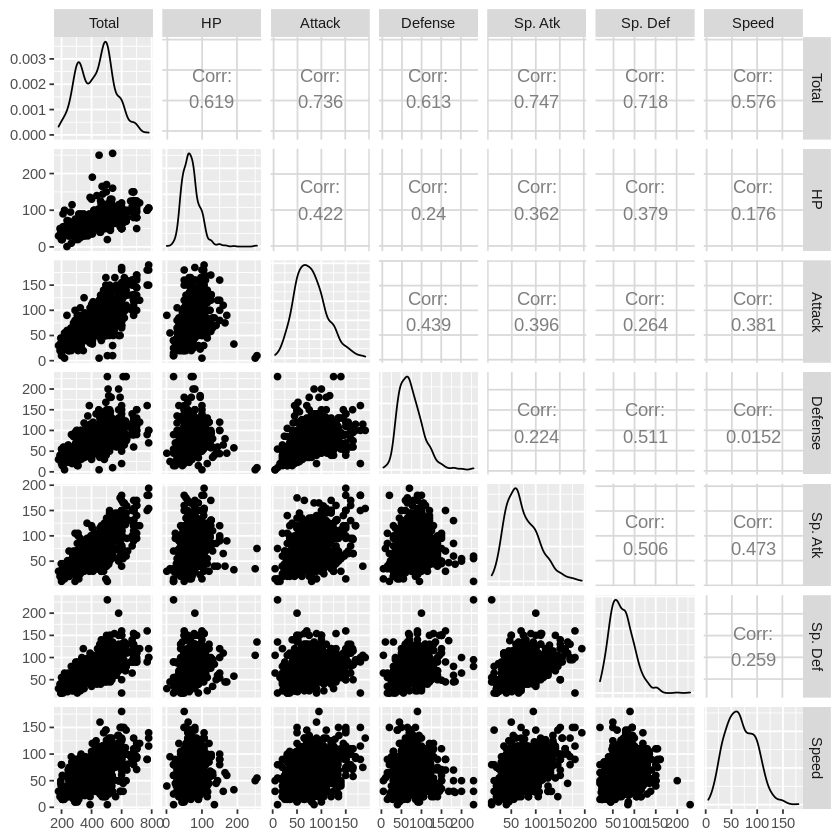

In [35]:
# reate a matrix of plots using ggpairs, choosing columns columns Total to Speed
pm_pairs <- pm_data %>%
    select("Total":"Speed")%>%
    ggpairs()
pm_pairs

In [36]:
# select the columns Speed and Defense
km_data <- pm_data %>%
   select(Speed, Defense)
km_data

Speed,Defense
<dbl>,<dbl>
45,49
60,63
80,83
80,123
⋮,⋮
110,110
70,60
80,60
70,120


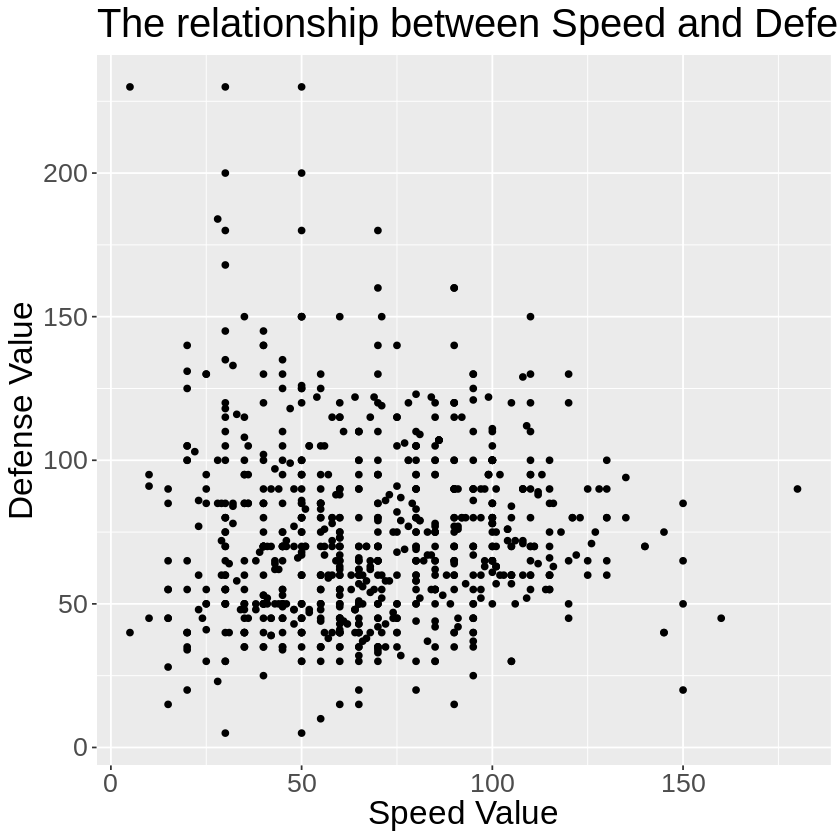

In [37]:
# make a scatterplot to visualize the relationship between Speed and Defense 
pm_scatter <- km_data %>%
      ggplot(aes(x = Speed, y = Defense)) +
      geom_point() +
      labs(x = "Speed Value", y = "Defense Value", title = "The relationship between Speed and Defense of the Pokemon") +
      theme(text = element_text(size = 20))

pm_scatter

In [38]:
# scale the data
scaled_km_data  <- km_data %>% 
      map_df(scale)
head(scaled_km_data)

Speed,Defense
"<dbl[,1]>","<dbl[,1]>"
-0.8010021,-0.7966553
-0.2848371,-0.3476999
0.4033830,0.2936649
0.4033830,1.5763945
-0.1127821,-0.9890647
0.4033830,-0.5080411


>We use the `kmeans`  to cluster the Pokemon based on their `Speed` and `Defense` variables.
>
>We first try 4 clusters and visualize these clusters. 

In [39]:
pokemon_clusters <- scaled_km_data%>%
     kmeans(centers = 4, nstart = 10)

pokemon_clusters

K-means clustering with 4 clusters of sizes 262, 180, 259, 99

Cluster means:
       Speed     Defense
1  1.1055250 -0.03986927
2 -0.7505326  0.31771609
3 -0.5486990 -0.89261236
4 -0.1256427  1.86306518

Clustering vector:
  [1] 3 3 1 4 3 1 1 1 1 2 2 4 4 3 3 3 3 3 3 1 3 3 1 1 3 1 3 1 3 1 1 1 2 4 3 2 1
 [38] 3 3 1 3 2 3 1 3 3 3 1 3 2 2 3 2 3 1 1 1 1 1 3 1 3 1 3 1 1 1 2 3 1 1 1 3 2
 [75] 2 3 3 3 3 1 2 2 4 1 1 2 2 4 2 2 3 3 1 3 2 3 2 2 4 3 1 1 1 4 3 2 2 4 1 1 2
[112] 2 2 2 1 1 2 2 4 2 4 3 4 1 1 2 1 3 3 1 1 1 1 1 1 1 1 4 1 1 1 4 2 3 3 3 1 3
[149] 2 2 4 2 4 1 1 2 1 1 1 3 3 1 1 1 1 1 2 2 1 3 1 1 2 2 4 3 1 3 3 3 1 3 2 1 3
[186] 3 3 3 3 2 2 3 1 3 3 2 2 2 3 2 2 2 3 3 1 1 3 3 1 3 2 1 4 1 2 1 3 3 1 2 4 2
[223] 4 4 4 3 2 1 2 4 4 1 4 1 3 2 3 4 3 2 2 3 2 3 2 4 3 1 1 1 3 4 2 1 3 3 2 3 1
[260] 3 1 3 1 1 4 3 2 4 4 4 1 1 3 1 1 1 3 3 1 1 3 2 2 4 3 2 3 1 3 3 3 3 2 3 3 2
[297] 3 3 1 3 1 3 2 3 3 1 1 3 3 3 2 3 1 1 2 1 3 3 3 3 3 3 3 4 3 3 2 4 2 4 2 4 4
[334] 4 3 1 1 3 1 1 1 1 1 1 3 3 2 3 1 1 3 3 3 2 2 4 3 1 3

In [40]:
# use the augment function create a data frame with the cluster assignments for each data point from k-means
clustered_data <- augment(pokemon_clusters, scaled_km_data)
clustered_data

Speed,Defense,.cluster
"<dbl[,1]>","<dbl[,1]>",<fct>
-0.8010021,-0.7966553,3
-0.2848371,-0.3476999,3
0.4033830,0.2936649,1
0.4033830,1.5763945,4
⋮,⋮,⋮
1.43571300,1.1595074,1
0.05927295,-0.4439046,3
0.40338296,-0.4439046,1
0.05927295,1.4801898,4


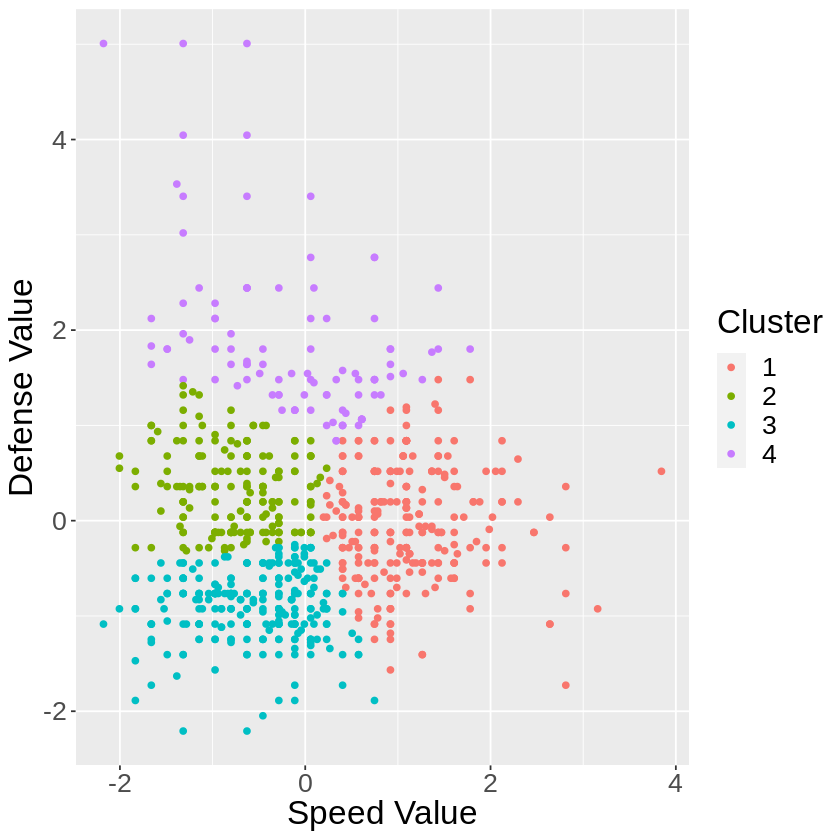

In [41]:
# plot the clusters
clusted_plot <- clustered_data%>%
    ggplot(aes(x = Speed, y = Defense, colour = .cluster))+
    geom_point()+
    labs(x = "Speed Value", y = "Defense Value", colour = "Cluster")+
    theme(text = element_text(size = 20))

clusted_plot

> Next, we will choose $k$ from $k$ = 1 to $k$ = 10, and exam how the total within-cluster sum of squares changes as we change $k$ on elbow plot

In [43]:
glance(pokemon_clusters)

totss,tot.withinss,betweenss,iter
<dbl>,<dbl>,<dbl>,<int>
1598,528.2769,1069.723,3


In [44]:
elbow_stats <- tibble(k = 1:10)%>%
    mutate(poke_clusts = map(k, ~kmeans(scaled_km_data, nstart = 10, .x)),
           glanced = map(poke_clusts, glance))%>%
    select(-poke_clusts)%>%
    unnest(glanced)


elbow_stats

k,totss,tot.withinss,betweenss,iter
<int>,<dbl>,<dbl>,<dbl>,<int>
1,1598,1598.0000,2.046363e-12,1
2,1598,1031.4596,5.665404e+02,1
3,1598,640.4274,9.575726e+02,3
4,1598,528.2769,1.069723e+03,3
⋮,⋮,⋮,⋮,⋮
7,1598,306.0494,1291.951,6
8,1598,267.6843,1330.316,4
9,1598,235.6435,1362.356,4
10,1598,217.5832,1380.417,5


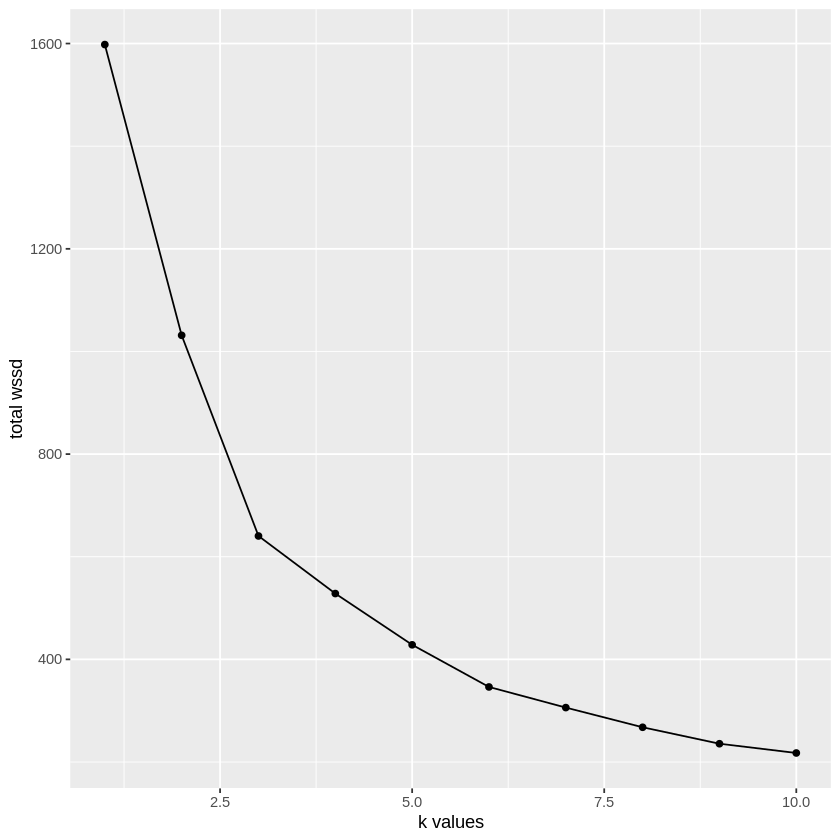

In [45]:
elbow_plot <- elbow_stats%>%
    ggplot(aes(x=k, y = tot.withinss))+
    geom_point()+
    geom_line()+
    labs(x = "k values", y = "total wssd")

elbow_plot

>Based on the elbow plot above, we choose $k$ = 3.
>
>Using the value that you chose for k, perform the k-means algorithm.

K-means clustering with 3 clusters of sizes 365, 158, 277

Cluster means:
       Speed     Defense
1 -0.6397889 -0.59238497
2 -0.4007020  1.45806679
3  1.0716024 -0.05109762

Clustering vector:
  [1] 1 1 3 2 1 3 3 3 3 1 1 2 2 1 1 1 1 1 1 3 1 1 3 3 1 3 1 3 1 3 3 3 1 2 1 1 3
 [38] 1 1 3 1 1 1 3 1 1 1 3 1 1 1 1 1 1 3 3 3 3 3 1 3 1 3 1 3 3 3 2 3 3 3 3 1 1
 [75] 1 1 1 1 1 3 2 2 2 3 3 1 2 2 1 2 1 1 3 1 3 1 1 2 2 1 3 3 3 2 1 1 2 2 3 3 1
[112] 1 2 2 3 3 1 2 2 2 2 1 2 3 3 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 2 1 1 1 1 3 1
[149] 1 2 2 2 2 3 3 1 3 3 3 1 1 3 3 3 3 3 1 1 2 1 3 3 1 1 2 1 3 1 1 1 3 1 1 3 1
[186] 1 1 1 1 1 1 1 3 1 1 1 2 2 1 1 2 1 1 3 3 3 1 1 3 1 1 3 2 3 1 3 1 1 3 1 2 1
[223] 2 2 2 1 1 3 2 2 2 3 2 3 1 1 1 2 1 1 1 1 1 1 1 2 1 3 3 3 1 2 2 3 1 1 2 1 3
[260] 3 3 1 3 3 2 1 1 2 2 2 3 3 1 3 3 3 1 1 3 3 1 1 2 2 1 1 1 3 1 1 1 1 1 1 1 1
[297] 1 1 3 3 3 3 2 1 1 3 3 1 1 1 3 1 3 3 2 3 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 2 2
[334] 2 1 3 3 1 3 3 3 3 3 3 1 1 1 1 3 3 1 1 1 1 2 2 1 3 1 1 1 3 1 1 1 3 2 3 1 1
[371] 

Speed,Defense,.cluster
"<dbl[,1]>","<dbl[,1]>",<fct>
-0.8010021,-0.7966553,1
-0.2848371,-0.3476999,1
0.4033830,0.2936649,3
0.4033830,1.5763945,2
⋮,⋮,⋮
1.43571300,1.1595074,3
0.05927295,-0.4439046,1
0.40338296,-0.4439046,3
0.05927295,1.4801898,2


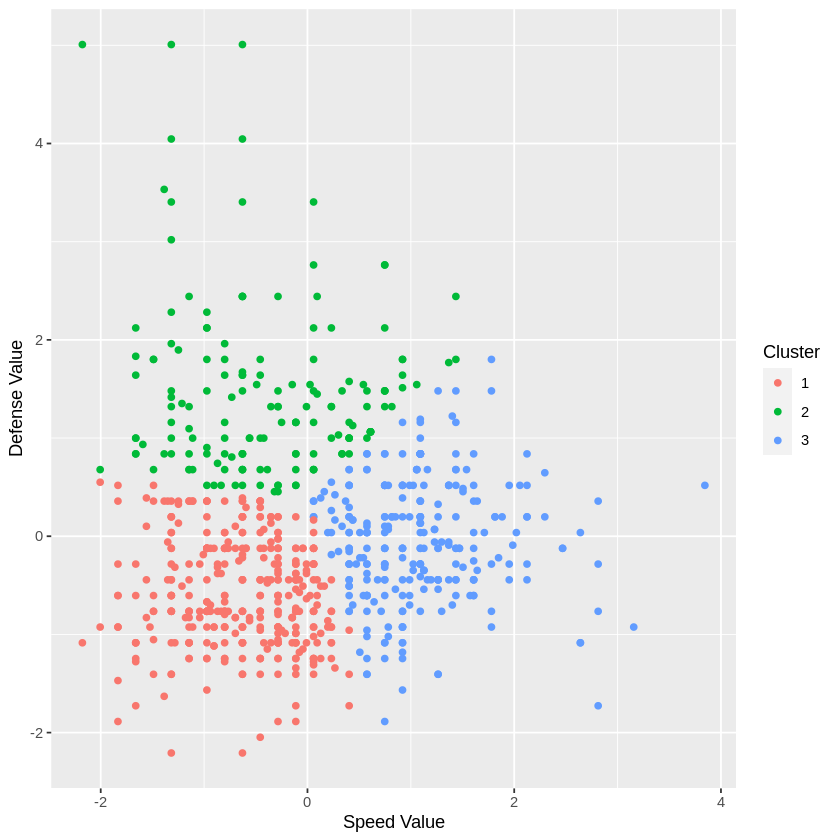

In [46]:
k = 3

pokemon_final_kmeans <- scaled_km_data%>%
       kmeans(centers = k, nstart = 10)
pokemon_final_kmeans

pokemon_final_clusters <- augment(pokemon_final_kmeans, scaled_km_data)
pokemon_final_clusters

pokemon_final_clusters_plot<- pokemon_final_clusters%>%
    ggplot(aes(x = Speed, y = Defense, colour = .cluster))+
    geom_point()+
    labs(x = "Speed Value", y = "Defense Value", colour = "Cluster")

pokemon_final_clusters_plot

>Using `Speed` and `Defense`, we find some number of clusters in our data. However, we have more information in our dataset that could be useful for clustering. 
>
>Select all the numeric type columns only from the full data set `pm_data`.

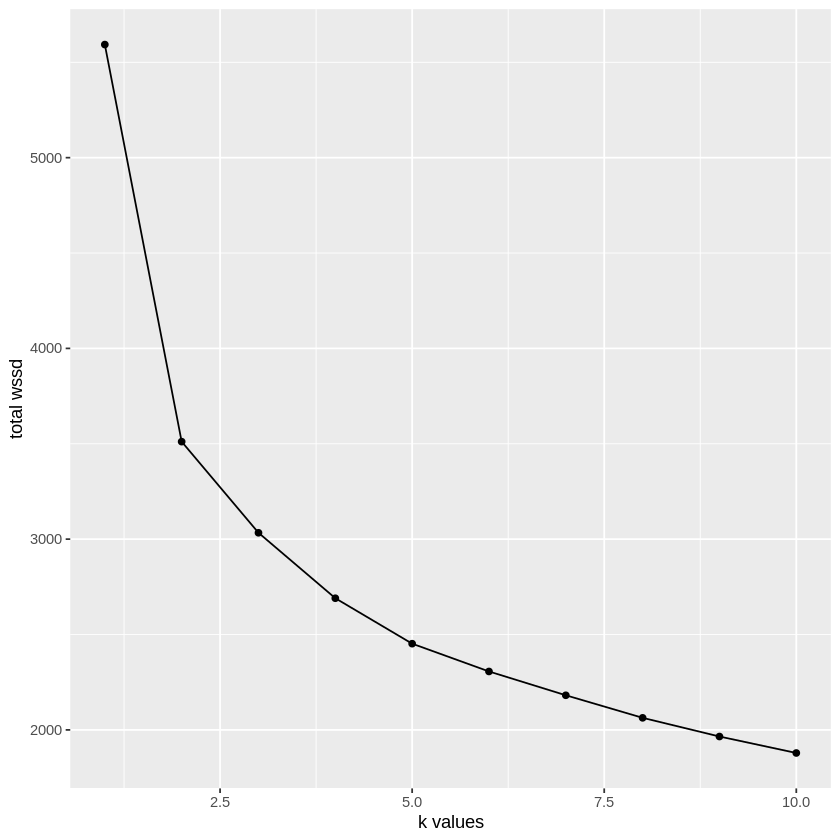

In [47]:
pm_multi <- pm_data %>%
    select("Total":"Speed")%>%
    map_df(scale)

pm_multi_elbow_stats <- tibble(k = 1:10)%>%
    mutate(poke_clusts = map(k, ~kmeans(pm_multi, nstart = 10, .x)),
           glanced = map(poke_clusts, glance))%>%
    select(-poke_clusts)%>%
    unnest(glanced)

pm_multi_elbow_plot <- pm_multi_elbow_stats%>%
    ggplot(aes(x=k, y = tot.withinss))+
    geom_point()+
    geom_line()+
    labs(x = "k values", y = "total wssd")
pm_multi_elbow_plot

> Determine $k$ = 2.

In [49]:
k = 2

pokemon_multi_kmeans <- pm_multi %>%
       kmeans(centers = k, nstart = 10)
pokemon_multi_kmeans

pokemon_multi_clusters <- augment(pokemon_multi_kmeans, pm_multi)
pokemon_multi_clusters



K-means clustering with 2 clusters of sizes 378, 422

Cluster means:
       Total         HP     Attack    Defense    Sp. Atk    Sp. Def      Speed
1 -0.8838645 -0.5879347 -0.6374233 -0.5558041 -0.6170218 -0.6599417 -0.4969472
2  0.7917080  0.5266335  0.5709621  0.4978530  0.5526878  0.5911326  0.4451328

Clustering vector:
  [1] 1 1 2 2 1 1 2 2 2 1 1 2 2 1 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1 2 1 2 1 2 1 1 2
 [38] 1 1 2 1 2 1 2 1 2 1 2 1 1 2 1 1 1 2 1 1 1 2 1 2 1 2 1 2 1 1 2 1 1 2 2 1 1
 [75] 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 2 1 1 2 1 2 1 2 1 2 1 1 2 2 1 1 2 1 2 1 2 1
[112] 2 1 1 2 2 1 1 2 1 2 2 1 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2
[149] 1 1 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1
[186] 2 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1 2 1 1 2 1 1 2 1 1 2 2 2 1 2 2 1 1 2 1 2 1
[223] 1 2 2 1 2 1 2 2 2 2 2 1 1 2 1 1 1 2 1 1 2 1 2 2 1 2 2 2 1 2 2 2 1 1 2 1 1
[260] 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2
[297] 1 1 2 1 1 1 1 1 1 2 2 1 1 1 

Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,.cluster
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
-0.9761548,-0.9500319,-0.92432794,-0.7966553,-0.2389808,-0.2480334,-0.8010021,1
-0.2509315,-0.3625953,-0.52380252,-0.3476999,0.2194223,0.2909743,-0.2848371,1
0.7493766,0.4206536,0.09239043,0.2936649,0.8306264,1.0096513,0.4033830,2
1.5829667,0.4206536,0.64696408,1.5763945,1.5029509,1.7283282,0.4033830,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2.208159,-0.7542197,2.4955429,1.1595074,2.664239,1.3689897,1.43571300,2
1.374569,0.4206536,0.9550606,-0.4439046,2.358637,2.0876667,0.05927295,2
2.041441,0.4206536,2.4955429,-0.4439046,2.969841,2.0876667,0.40338296,2
1.374569,0.4206536,0.9550606,1.4801898,1.747432,0.6503128,0.05927295,2


> We haven't done since visualizing these clusters is not a simple task given the high-dimensionality of the model.
>
> Instead, we will use density plot.